<a href="https://colab.research.google.com/github/MatthiasSimons/covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierung und Auswertung großer Datenmengen
## Einfluss des Entwicklungs- und Wohlstand auf die Covid-19 Pandemie

# Einleitung
...

Vorgehensweise


*   Importieren
*   Bereinigen
*   Modifizieren
*   Modellieren
*   Validieren
*   Bewerten
*   Zusammenfassen

# Gliederung
CRoos Industry Standard Process for Data Mining (CRISP-DM)

1.   Business Understanding
2.   Data Understanding
3.   Data Preperation
4.   Modelling
5.   .... 



## Vorbereitung

Importieren der Bibliotheken



In [216]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import folium
import pycountry_convert as pc
from IPython.display import HTML

# 1. Business Understanding
## 1.1 Was bedeuted Wohlstand und Entwicklung?
Kennzahlen:
- Bruttoinlandsprodukt
    - Klassifizieren
- Human Development Index

## 1.2 Wie kann der Pandemie Verlauf bewertet werden?
Kennzahlen:
- Reproduktionszahl
- Inzidenz
- Sterbe-, Impfrate
- strenge der Regeln (stringency Index)

# 2. Data Understanding

| Metrics                     | Source                                                    | Updated | Countries |
|-----------------------------|-----------------------------------------------------------|---------|-----------|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 209       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 129       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 34        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 191       |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 183       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 182       |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 181       |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 218       |

source: https://github.com/owid/covid-19-data/blob/master/public/data/README.md

## 2.1 Importieren der Daten

In [363]:
# the dataset csv file is from github user owid. The file was saved for backup purposes

#dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=',')
#dataset.to_csv(r"data/covid-dataset.csv") #25.07.2021
dataset = pd.read_csv(r"data/covid-dataset.csv", sep=',')
dataset.name ="Dataset"
dataset["date"] = pd.to_datetime(dataset["date"])
dataset = dataset.set_index(['location', 'date'])
dataset

Unnamed: 0 iso_code continent  total_cases  new_cases  \
location    date                                                                
Afghanistan 2020-02-24           0      AFG      Asia          1.0        1.0   
            2020-02-25           1      AFG      Asia          1.0        0.0   
            2020-02-26           2      AFG      Asia          1.0        0.0   
            2020-02-27           3      AFG      Asia          1.0        0.0   
            2020-02-28           4      AFG      Asia          1.0        0.0   
...                            ...      ...       ...          ...        ...   
Zimbabwe    2021-07-20      104796      ZWE    Africa      88415.0     2683.0   
            2021-07-21      104797      ZWE    Africa      91120.0     2705.0   
            2021-07-22      104798      ZWE    Africa      93421.0     2301.0   
            2021-07-23      104799      ZWE    Africa      95686.0     2265.0   
            2021-07-24      104800      ZWE    Africa      97277.0     1591.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-07-20            2163.429        2747.0        50.0   
            2021-07-21            2105.571        2809.0        62.0   
            2021-07-22            2078.429        2870.0        61.0   
            2021-07-23            2074.000        2961.0        91.0   
            2021-07-24            2094.857        3050.0        89.0   

                        new_deaths_smoothed  total_cases_per_million  ...  \
location    date                                                      ...   
Afghanistan 2020-02-24                  NaN                    0.026  ...   
            2020-02-25                  NaN                    0.026  ...   
            2020-02-26                  NaN                    0.026  ...   
            2020-02-27                  NaN                    0.026  ...   
            2020-02-28                  NaN                    0.026  ...   
...                                     ...                      ...  ...   
Zimbabwe    2021-07-20               67.571                 5948.694  ...   
            2021-07-21               68.143                 6130.690  ...   
            2021-07-22               64.571                 6285.505  ...   
            2021-07-23               63.000                 6437.897  ...   
            2021-07-24               66.000                 6544.942  ...   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
            2020-02-27              NaN                597.029   
            2020-02-28              NaN                597.029   
...                                 ...                    ...   
Zimbabwe    2021-07-20             21.4                307.846   
            2021-07-21             21.4                307.846   
            2021-07-22             21.4                307.846   
            2021-07-23             21.4                307.846   
            2021-07-24             21.4                307.846   

                        diabetes_prevalence  female_smokers  male_smokers  \
location    date                                                            
Afghanistan 2020-0

## 2.2 Beschreibung der Daten

Bei dem Datensatz handelt es sich um einen Datensatz der die Entwicklung der Covid-19 Fallzahlen weltweit täglich abbildet. Der Datensatz wird mithilfe der Bibliothek pandas_profiling zusammengefasst. beinhaltet 61 Spalten. In der folgenden Tabelle wird die Quelle der Spalten und eine kurze Beschreibung dargestellt. 

In [364]:
try:
    HTML(filename="covid-Dataset_profile.html")
except:
    profile = pandas_profiling.ProfileReport(dataset, minimal = True)
    profile.to_file(output_file="covid-Dataset_profile.html")
    HTML(filename="covid-Dataset_profile.html")

In [365]:
# the description csv file is from github user owid. The file was saved for backup purposes
#description = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv", sep=',')
#description.to_csv(r"data/covid-dataset_column-description.csv") #25.07.2021
pd.read_csv(r"data/covid-dataset_column-description.csv")

,Unnamed: 0,column,source,description
0,0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,1,continent,Our World in Data,Continent of the geographical location
2,2,location,Our World in Data,Geographical location
3,3,date,Our World in Data,Date of observation
4,4,total_cases,COVID-19 Data Repository by the Center for Sys...,Total confirmed cases of COVID-19
5,5,new_cases,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19
6,6,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19 (7-day smoothed)
7,7,total_deaths,COVID-19 Data Repository by the Center for Sys...,Total deaths attributed to COVID-19
8,8,new_deaths,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19
9,9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19 (7-day smoot...


# 3. Data Preperation
Verbesserung der Datenqualität durch:

*   Löschen von Zellen
*   Leere Zellen



## 3.1 Untersuchung der Datenqualität

In [366]:
def get_null_columns(df):
    print("Es fehlen",str(df.isnull().sum().sum()), "Einträge bzw.", int(100*df.isnull().sum().sum()/(len(df)*len(df.columns))), "%")
    return [index for index in df.isnull().sum().index if df.isnull().sum()[index] > 0]

dataset_null_columns = get_null_columns(dataset)
print("In {} von {} Spalten fehlen Werte".format(
    (dataset.isnull().sum() != 0).sum(), dataset.isnull().sum().count()))
#print("unvollständige Spalten: \n",dataset_null_columns)

Es fehlen 2545322 Einträge bzw. 41 %
In 57 von 59 Spalten fehlen Werte


In [367]:
df = dataset.isnull().sum(axis=1).groupby(level=0).agg(['count','sum'])
df["missing in %"] = 100*df["sum"]/(df["count"]*len(dataset.columns))
df.sort_values(by="missing in %").head(5)

,count,sum,missing in %
location,,,
Israel,521,6135,19.958359
Portugal,518,6184,20.234278
Italy,541,6546,20.508161
Estonia,538,6640,20.918657
Belgium,537,6655,21.004955


In [368]:
df = dataset.set_index('continent').isnull().sum(axis=1).groupby(level=0).agg(['count','sum'])
df["missing in %"] = 100*df["sum"]/(df["count"]*len(dataset.columns))
df.sort_values(by="missing in %").head()

,count,sum,missing in %
continent,,,
Europe,24774,491817,33.647701
South America,6260,133017,36.014783
Asia,24705,561639,38.531897
Africa,26871,677148,42.711789
North America,13123,355965,45.975044


- unklare Datenlage in vielen Ländern
- Untersuchung wo die Datenlage am besten ist
- Auswahl der Länder mit der besten Datenlage

## 3.2 Umgang mit fehlenden Werten
Anteil fehlender Werte in Spalte > 30-40 % -> Spalte löschen

Anteil fehlender Werte in Zeile > 20 % -> Zeile löschen

Wichtig ist auf die Korrelation zur Zielvariabel und Variablen mit hohem Informationsgehalt zu achten.

### 3.2.1 unnötige Spalten löschen

In [369]:
# löschen aller Spalten die "smoothed" (7 Tage Durchschnitt) enthalten 
try:
    dataset.drop(columns = [column for column in dataset.columns if "smoothed" in column], inplace = True)
except:
    pass
# löschen aller Spalten die "weekly" enthalten 
try:
    dataset.drop(columns = [column for column in dataset.columns if "weekly" in column], inplace = True)
except:
    pass

try:
    dataset.drop(columns = ["Unnamed: 0"], inplace = True)
except:
    pass

In [370]:
bad_quality_columns = missing_value_ratio[missing_value_ratio>40].index.tolist()
print(bad_quality_columns)
try:
    dataset = dataset.drop(columns=bad_quality_columns)
except:
    pass
try:
    dataset = dataset.dropna(thresh = int(0.2*len(dataset.columns)))
    dataset
except:
    pass

[]


In [371]:
dataset_null_columns = get_null_columns(dataset)
print("In {} von {} Spalten fehlen Werte".format(
    (dataset.isnull().sum() != 0).sum(), dataset.isnull().sum().count()))
#print("unvollständige Spalten: \n",dataset_null_columns)

Es fehlen 1739346 Einträge bzw. 37 %
In 45 von 46 Spalten fehlen Werte


### 3.2.2 fehlende Werte ergänzen

In [372]:
dataset.fillna(method="ffill", inplace = True)
dataset.fillna(0, inplace = True)

In [373]:
dataset[dataset["continent"].isna()==True].index.get_level_values(0).unique().to_list()
dataset.loc[dataset['continent'].isnull(), 'continent'] = dataset.loc[dataset['continent'].isnull()].index.get_level_values(0)

In [374]:
#dataset.interpolate(fill_value=0, limit_direction='backward', method = "linear", inplace = True)

In [375]:
print("Spaltennamen nach Anteil fehlender Werte sortiert")
#dataset.isnull().sum().sort_values(ascending=False).head(60)
missing_value_ratio = ((dataset.isnull().sum()/len(dataset))*100)
missing_value_ratio.sort_values(ascending=False).head(3)

Spaltennamen nach Anteil fehlender Werte sortiert


excess_mortality    0.0
icu_patients        0.0
tests_per_case      0.0
dtype: float64

## 3.3 Graphische Analyse

r = 0.1 für eine geringe Korrelation
r = 0.3 für eine mittlere Korrelation
r = 0.5 für eine hohe Korrelation

In [403]:
corr = dataset.corr()
corr
#corr[abs(corr)>0.5]

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.826474,0.911700,0.785013,0.128990,0.042606,0.131472,0.043790,0.020125,0.221788,...,-0.000911,-0.044788,0.012098,-0.052498,-0.040323,-0.001959,-0.037085,-0.000809,-0.014705,0.003678
new_cases,0.826474,1.000000,0.769209,0.907157,0.067582,0.085302,0.072202,0.074072,0.033870,0.264579,...,-0.004899,-0.044464,0.012914,-0.059004,-0.032259,0.009596,-0.036118,-0.004261,-0.012456,0.004201
total_deaths,0.911700,0.769209,1.000000,0.820811,0.105978,0.031760,0.182180,0.056830,0.024533,0.217279,...,-0.002722,-0.040383,0.008131,-0.057556,-0.055078,-0.006634,-0.041459,-0.010229,-0.021850,0.015516
new_deaths,0.785013,0.907157,0.820811,1.000000,0.052643,0.061101,0.094958,0.125711,0.023800,0.252962,...,-0.001747,-0.048923,-0.003817,-0.064833,-0.044980,0.016169,-0.040624,-0.013997,-0.020124,0.029584
total_cases_per_million,0.128990,0.067582,0.105978,0.052643,1.000000,0.429444,0.697577,0.297850,-0.042084,0.017441,...,-0.190584,-0.165497,0.068963,0.238460,0.046616,0.118048,0.136058,0.333816,0.342179,0.118021
new_cases_per_million,0.042606,0.085302,0.031760,0.061101,0.429444,1.000000,0.252205,0.487727,0.088849,0.044009,...,-0.139498,-0.108881,0.046490,0.157725,0.057074,0.101071,0.097661,0.218258,0.232237,0.125349
total_deaths_per_million,0.131472,0.072202,0.182180,0.094958,0.697577,0.252205,1.000000,0.372538,-0.017197,0.006095,...,-0.163129,-0.104473,0.057108,0.236621,0.001882,0.133340,0.117664,0.260037,0.261945,0.199120
new_deaths_per_million,0.043790,0.074072,0.056830,0.125711,0.297850,0.487727,0.372538,1.000000,-0.002258,0.038215,...,-0.117872,-0.071934,0.011262,0.151247,0.029198,0.100184,0.085054,0.154288,0.168175,0.298804
reproduction_rate,0.020125,0.033870,0.024533,0.023800,-0.042084,0.088849,-0.017197,-0.002258,1.000000,0.017617,...,-0.094111,-0.028298,-0.008245,0.041213,0.030842,0.038736,0.049282,0.105585,0.119875,-0.071555
icu_patients,0.221788,0.264579,0.217279,0.252962,0.017441,0.044009,0.006095,0.038215,0.017617,1.000000,...,-0.034826,0.041611,-0.057093,-0.014234,-0.005558,-0.099085,-0.022138,0.003247,0.023683,-0.093821


<AxesSubplot:xlabel='human_development_index', ylabel='total_cases_per_million'>

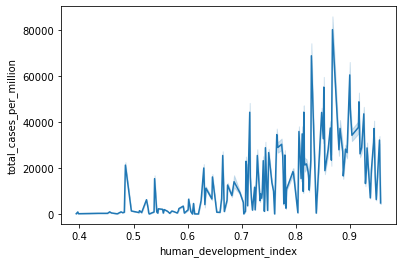

In [411]:
sns.lineplot(x="human_development_index", y="total_cases_per_million", data=dataset)

# Wie bewerte ich den Wohlstand und wie den Pandemieverlauf